<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2022/blob/main/Barrages/GroupsData/PlotGroupsData_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/MCTE_2022/main/libs/mpl_utils.py &> /dev/null

import mpl_utils as mut
mut.config_plots()
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (7, 3)

In [3]:
df = pd.read_excel( 'BarragesData_2022.xlsx', sheet_name='Sheet1', skiprows=(1,) )
df

,Group,Students,a,b,c,T1,A1,𝜔1,𝜙1,T2,A2,𝜔2,𝜙2
0,1,Diogo Medroa / Mónica Teixeira,-92696.40,1272972.00,23310000.0,12.42,3.00,0.000141,-2.0,12.6584,1.40,0.000138,-3.0
1,2,Freek Postma / Jorn de Haan,-93726.36,1540296.12,30536100.0,12.42,3.50,0.000141,-1.0,12.0000,1.50,0.000145,-2.2
2,3,Mohammed Pottayil / Rodrigo Ospina,-79306.92,1451188.08,25361280.0,12.42,3.31,0.000141,-1.8,12.6584,1.21,0.000138,-2.5
3,4,Clothilde Pesneau / Bernard Heikema,-79306.92,1260242.28,24941700.0,12.42,2.87,0.000141,-1.9,12.0000,1.27,0.000145,-1.0
4,5,NaN,-130804.92,2635052.04,46620000.0,12.42,4.21,0.000141,-0.9,12.6584,1.80,0.000138,-1.5
5,6,NaN,-147284.28,1973106.60,41258700.0,12.42,4.30,0.000141,-1.0,12.0000,1.98,0.000145,1.0
6,7,NaN,-193632.48,3564321.60,53613000.0,12.42,2.88,0.000141,-1.5,12.6584,0.90,0.000138,2.0
7,8,NaN,-40168.44,801972.36,17948700.0,12.42,2.80,0.000141,-2.0,12.0000,1.11,0.000145,3.0


In [4]:
def plot_time_series( ID ):
  N = ID-1

  a = df['a'][N]
  b = df['b'][N]
  c = df['c'][N]

  A1 = df['A1'][N]
  A2 = df['A2'][N]
  ω1 = df['𝜔1'][N]
  ω2 = df['𝜔2'][N]
  φ1 = df['𝜙1'][N]
  φ2 = df['𝜙2'][N]

  name = df['Group'][N]
  tide_period = 1.0 / np.abs( ω2 - ω1 ) * 2.0*np.pi

  t = np.linspace( 0, tide_period, 1000 )
  ζ = A1 * np.cos( ω1 * t + φ1 ) + A2 * np.cos( ω2 * t + φ2 )

  fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
  fig.subplots_adjust( wspace = 0.18 )

  t_hours = t/3600
  ax1.plot( t_hours, ζ )
  ax1.set_title( 'Group ID: %i' % name )
  ax1.set_xlabel( '$t$ [hour]' )
  ax1.set_ylabel( '$\zeta_\mathrm{tide}$ [m]' )

  As = A1+A2
  z = np.linspace( -As, As, 100 )
  f = a*z**2 + b*z + c
  ax2.plot( z, f, 'r' )
  ax2.set_xlabel( '$z$ [m]' )
  ax2.set_ylabel( '$A_\mathrm{basin}$ [m$^3$]' )
  ax2.ticklabel_format(scilimits=[-3,3])


2374087.167785209


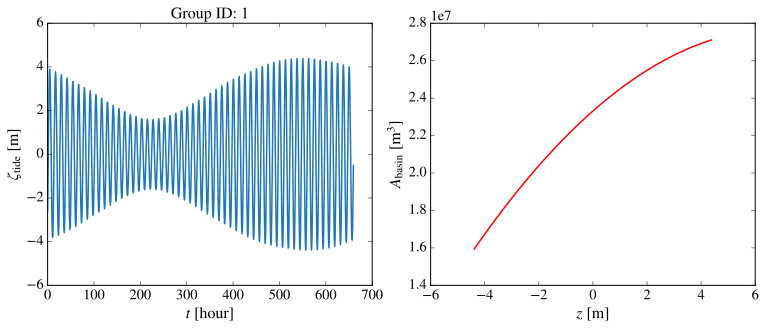

In [5]:
plot_time_series( 1 )

1277485.7142857183


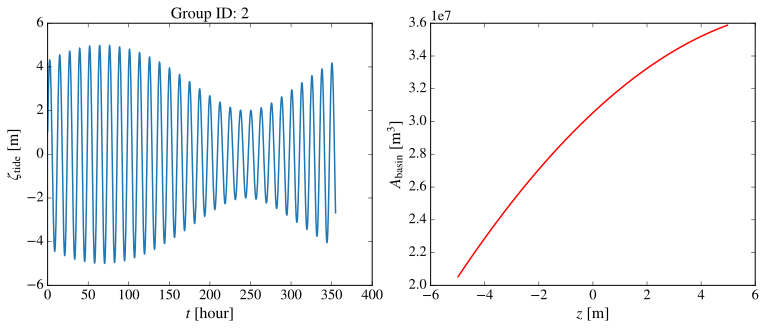

In [6]:
plot_time_series( 2 )

2374087.167785209


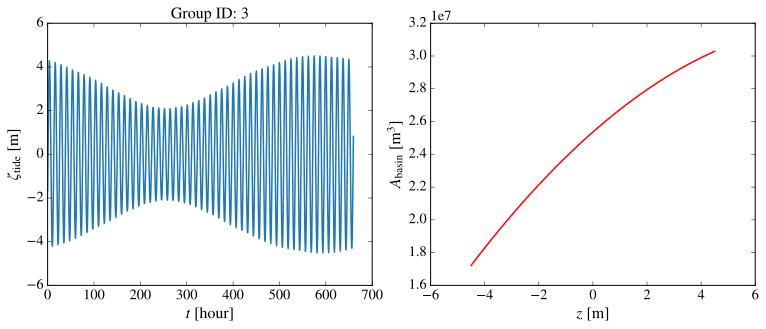

In [7]:
plot_time_series( 3 )

1277485.7142857183


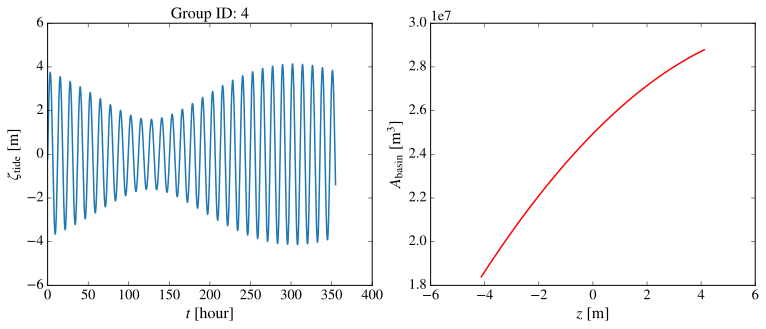

In [8]:
plot_time_series( 4 )

2374087.167785209


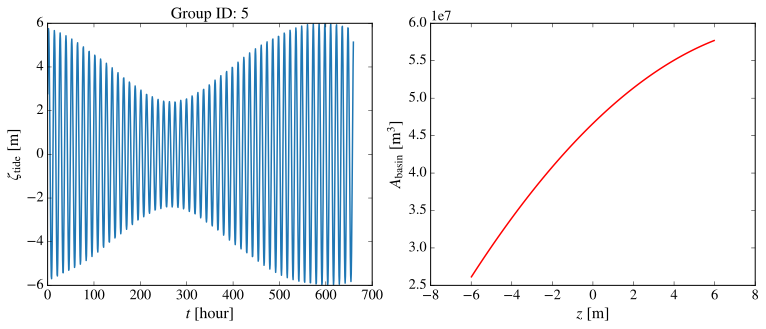

In [9]:
plot_time_series( 5 )

1277485.7142857183


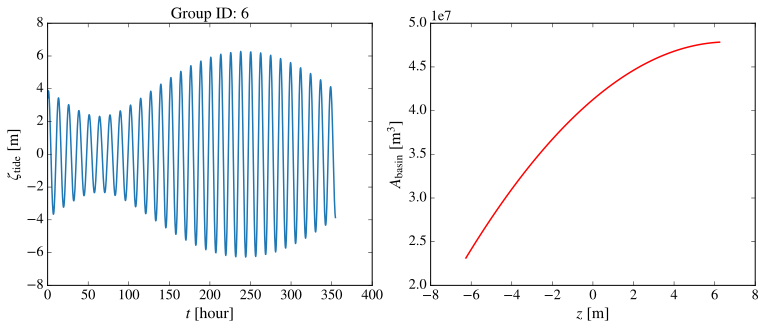

In [10]:
plot_time_series( 6 )

2374087.167785209


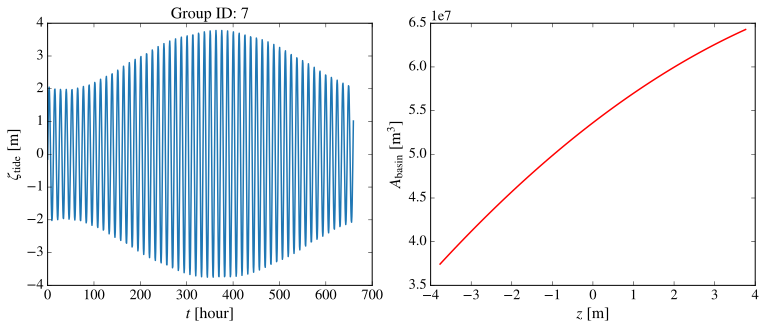

In [11]:
plot_time_series( 7 )

1277485.7142857183


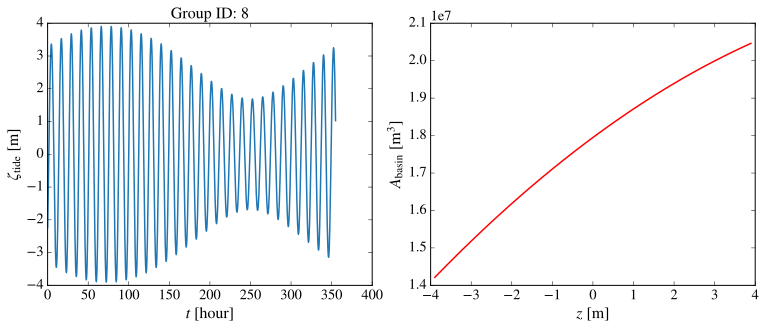

In [12]:
plot_time_series( 8 )